In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Bidirectional, Dense
from keras.callbacks import EarlyStopping
import time

# Kshitiz Bhargava 21BCE2067

In [2]:
# Step 1: Fetch Google Stock Data
stock_data = yf.download("GOOGL", start="2010-01-01", end="2023-01-01")
data = stock_data[['Close']].values  # Use only the closing price

# Step 2: Data Normalization
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Step 3: Create Sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

SEQ_LENGTH = 60  # Use the past 60 days to predict the next day's price
X, y = create_sequences(data_scaled, SEQ_LENGTH)

# Step 4: Split into Train, Validation, and Test Sets
train_size = int(0.8 * len(X))
val_size = int(0.1 * len(X))

X_train, X_val, X_test = X[:train_size], X[train_size:train_size + val_size], X[train_size + val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size + val_size], y[train_size + val_size:]

# Kshitiz Bhargava 21BCE2067

[*********************100%***********************]  1 of 1 completed


In [3]:
# Step 5: Define LSTM Model
lstm_model = Sequential([
    LSTM(50, return_sequences=False, input_shape=(SEQ_LENGTH, 1)),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')

# Train LSTM Model
start_time = time.time()
lstm_history = lstm_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10, batch_size=32,
    callbacks=[EarlyStopping(patience=5)],
    verbose=1
)
lstm_time = time.time() - start_time

# Kshitiz Bhargava 21BCE2067

Epoch 1/10
81/81 [==============================] - 1s 9ms/step - loss: 0.0037 - val_loss: 6.9696e-04
Epoch 2/10
81/81 [==============================] - 1s 7ms/step - loss: 1.1711e-04 - val_loss: 5.2828e-04
Epoch 3/10
81/81 [==============================] - 1s 7ms/step - loss: 1.0556e-04 - val_loss: 7.2347e-04
Epoch 4/10
81/81 [==============================] - 1s 7ms/step - loss: 9.8755e-05 - val_loss: 0.0015
Epoch 5/10
81/81 [==============================] - 1s 7ms/step - loss: 9.0597e-05 - val_loss: 0.0015
Epoch 6/10
81/81 [==============================] - 1s 7ms/step - loss: 8.8372e-05 - val_loss: 0.0017
Epoch 7/10
81/81 [==============================] - 1s 7ms/step - loss: 8.3471e-05 - val_loss: 0.0017


In [4]:
# Step 6: Define Bi-LSTM Model
bilstm_model = Sequential([
    Bidirectional(LSTM(50, return_sequences=False), input_shape=(SEQ_LENGTH, 1)),
    Dense(1)
])
bilstm_model.compile(optimizer='adam', loss='mse')

# Train Bi-LSTM Model
start_time = time.time()
bilstm_history = bilstm_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10, batch_size=32,
    callbacks=[EarlyStopping(patience=5)],
    verbose=1
)
bilstm_time = time.time() - start_time

# Kshitiz Bhargava 21BCE2067

Epoch 1/10
81/81 [==============================] - 2s 11ms/step - loss: 0.0052 - val_loss: 0.0027
Epoch 2/10
81/81 [==============================] - 1s 7ms/step - loss: 2.9197e-04 - val_loss: 0.0011
Epoch 3/10
81/81 [==============================] - 1s 7ms/step - loss: 2.3016e-04 - val_loss: 6.3859e-04
Epoch 4/10
81/81 [==============================] - 1s 7ms/step - loss: 1.9027e-04 - val_loss: 0.0011
Epoch 5/10
81/81 [==============================] - 1s 7ms/step - loss: 1.3747e-04 - val_loss: 8.9171e-04
Epoch 6/10
81/81 [==============================] - 1s 7ms/step - loss: 1.1938e-04 - val_loss: 0.0029
Epoch 7/10
81/81 [==============================] - 1s 7ms/step - loss: 1.0708e-04 - val_loss: 6.6264e-04
Epoch 8/10
81/81 [==============================] - 1s 7ms/step - loss: 1.0171e-04 - val_loss: 0.0020


In [5]:
# Step 7: Evaluate Models
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_model.predict(X_test)))
bilstm_rmse = np.sqrt(mean_squared_error(y_test, bilstm_model.predict(X_test)))

# Step 8: Compare Model Complexity
lstm_params = lstm_model.count_params()
bilstm_params = bilstm_model.count_params()

# Step 9: Print Results
print(f"LSTM RMSE: {lstm_rmse}, Time: {lstm_time}s, Params: {lstm_params}")
print(f"Bi-LSTM RMSE: {bilstm_rmse}, Time: {bilstm_time}s, Params: {bilstm_params}")

# Kshitiz Bhargava 21BCE2067

11/11 [==============================] - 0s 2ms/step
LSTM RMSE: 0.05222154249599315, Time: 4.820071220397949s, Params: 10451
Bi-LSTM RMSE: 0.04201792060984668, Time: 5.97606086730957s, Params: 20901


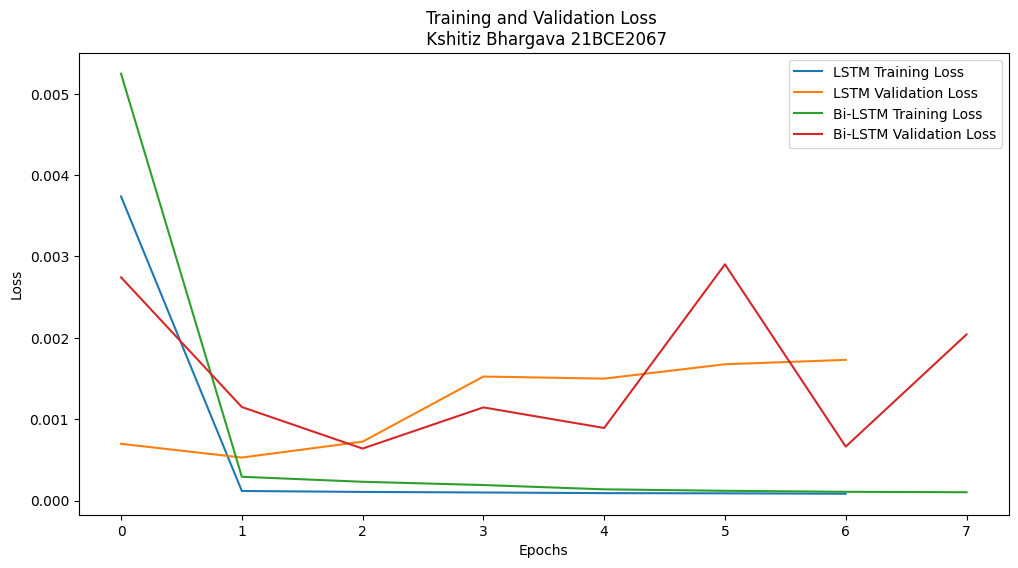

In [6]:
# Step 10: Plot Loss Curves
plt.figure(figsize=(12, 6))
plt.plot(lstm_history.history['loss'], label='LSTM Training Loss')
plt.plot(lstm_history.history['val_loss'], label='LSTM Validation Loss')
plt.plot(bilstm_history.history['loss'], label='Bi-LSTM Training Loss')
plt.plot(bilstm_history.history['val_loss'], label='Bi-LSTM Validation Loss')
plt.title("Training and Validation Loss \n Kshitiz Bhargava 21BCE2067")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Kshitiz Bhargava 21BCE2067